# Plot X-ray Diffraction Data

This notebook reads and visualizes the tab-separated X-ray diffraction data from `0.xray`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up plotting
%matplotlib inline
plt.style.use('default')


In [3]:
# Path to the data file
file_path = '/Users/ericdill/dev/ericdill/martinlab/documents-in-lab-notebooks/Dill-04/83/EDD_4-83a/diffraction/0.xray'

# Read the file, skipping header comments and the initial lines
data_lines = []
skip_next_blank = False

with open(file_path, 'r') as f:
    for line in f:
        line = line.strip()
        # Skip comment lines
        if line.startswith('#'):
            continue
        # Skip the "xyI_column" line
        if line == 'xyI_column':
            skip_next_blank = True
            continue
        # Skip the blank line after "xyI_column"
        if skip_next_blank and line == '':
            skip_next_blank = False
            continue
        # Skip blank lines
        if line == '':
            continue
        # Collect data lines
        data_lines.append(line)

print(f"Read {len(data_lines)} data points")


Read 6400 data points


In [4]:
# Parse the tab-separated data
x_pixels = []
y_pixels = []
intensities = []

for line in data_lines:
    parts = line.split('\t')
    if len(parts) >= 3:
        x_pixels.append(float(parts[0]))
        y_pixels.append(float(parts[1]))
        intensities.append(float(parts[2]))

# Convert to numpy arrays
x_pixels = np.array(x_pixels)
y_pixels = np.array(y_pixels)
intensities = np.array(intensities)

print(f"X pixel range: {x_pixels.min():.1f} to {x_pixels.max():.1f}")
print(f"Y pixel range: {y_pixels.min():.1f} to {y_pixels.max():.1f}")
print(f"Intensity range: {intensities.min():.2e} to {intensities.max():.2e}")


X pixel range: -40.0 to 39.0
Y pixel range: -40.0 to 39.0
Intensity range: 2.67e+06 to 4.09e+12


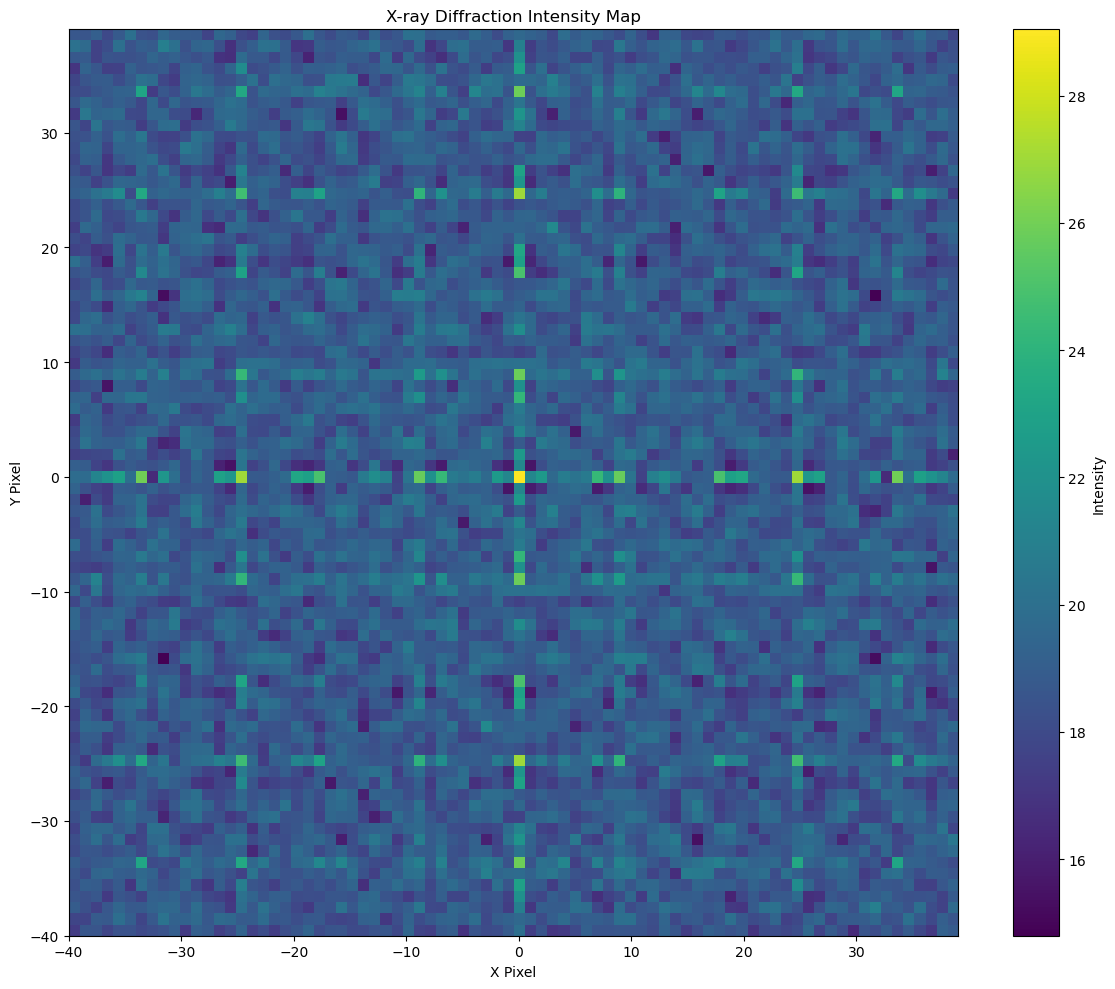

In [8]:
# Create a 2D histogram/heatmap of the intensity
# Find unique pixel values to determine grid size
unique_x = np.unique(x_pixels)
unique_y = np.unique(y_pixels)

# Create mapping from pixel values to indices
x_to_idx = {val: idx for idx, val in enumerate(unique_x)}
y_to_idx = {val: idx for idx, val in enumerate(unique_y)}

# Create intensity grid by mapping data points
intensity_grid = np.zeros((len(unique_y), len(unique_x)))
for x, y, intensity in zip(x_pixels, y_pixels, intensities):
    x_idx = x_to_idx[x]
    y_idx = y_to_idx[y]
    intensity_grid[y_idx, x_idx] = np.log(intensity)

# Plot the 2D intensity map
plt.figure(figsize=(12, 10))
plt.imshow(intensity_grid, extent=[x_pixels.min(), x_pixels.max(),
                                   y_pixels.min(), y_pixels.max()],
           origin='lower', aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Intensity')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('X-ray Diffraction Intensity Map')
plt.tight_layout()
plt.show()


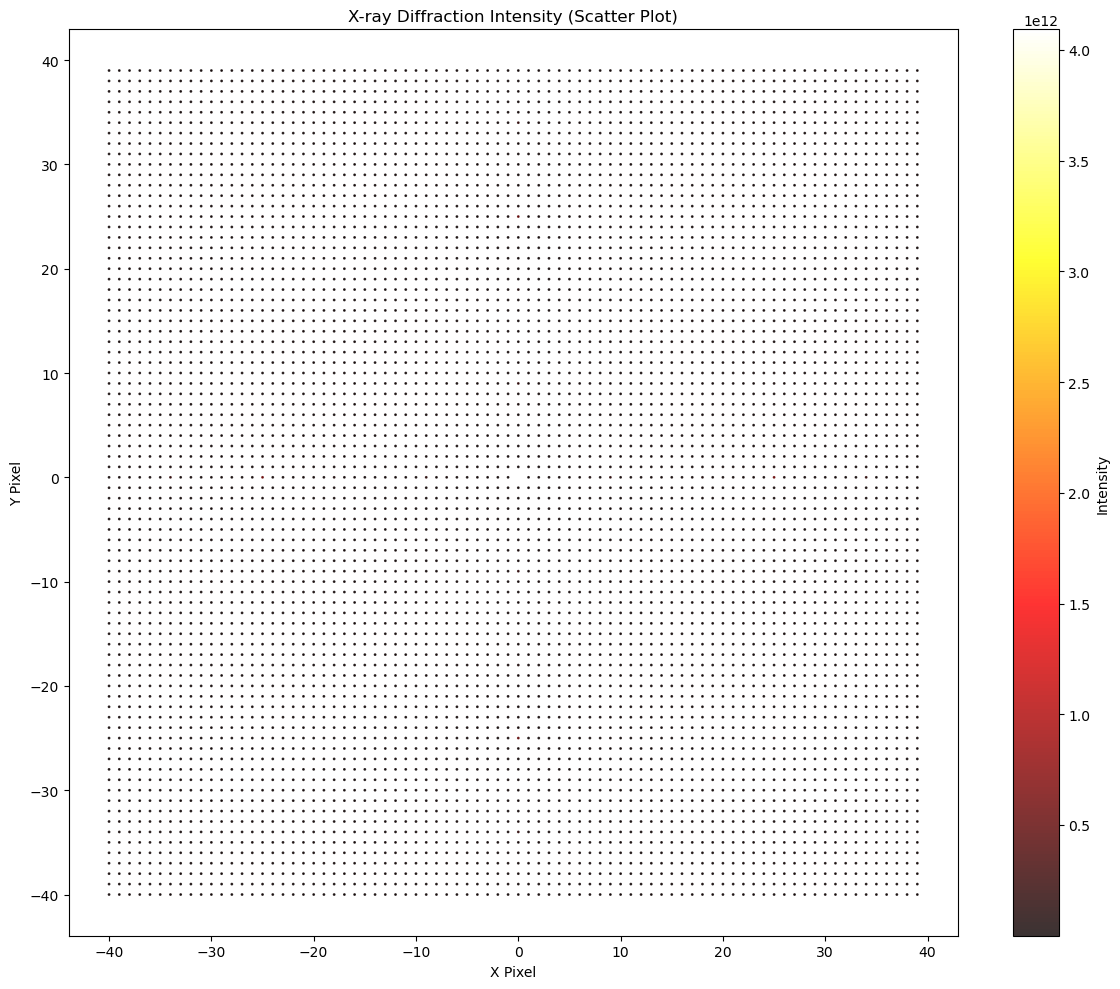

In [ ]:
# Alternative: Scatter plot with intensity as color
plt.figure(figsize=(12, 10))
scatter = plt.scatter(x_pixels, y_pixels, c=intensities,
                     cmap='viridis', s=1, alpha=0.8)
plt.colorbar(scatter, label='Intensity')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('X-ray Diffraction Intensity (Scatter Plot)')
plt.tight_layout()
plt.show()
